# Netflix - Data Exploration and Visualisation

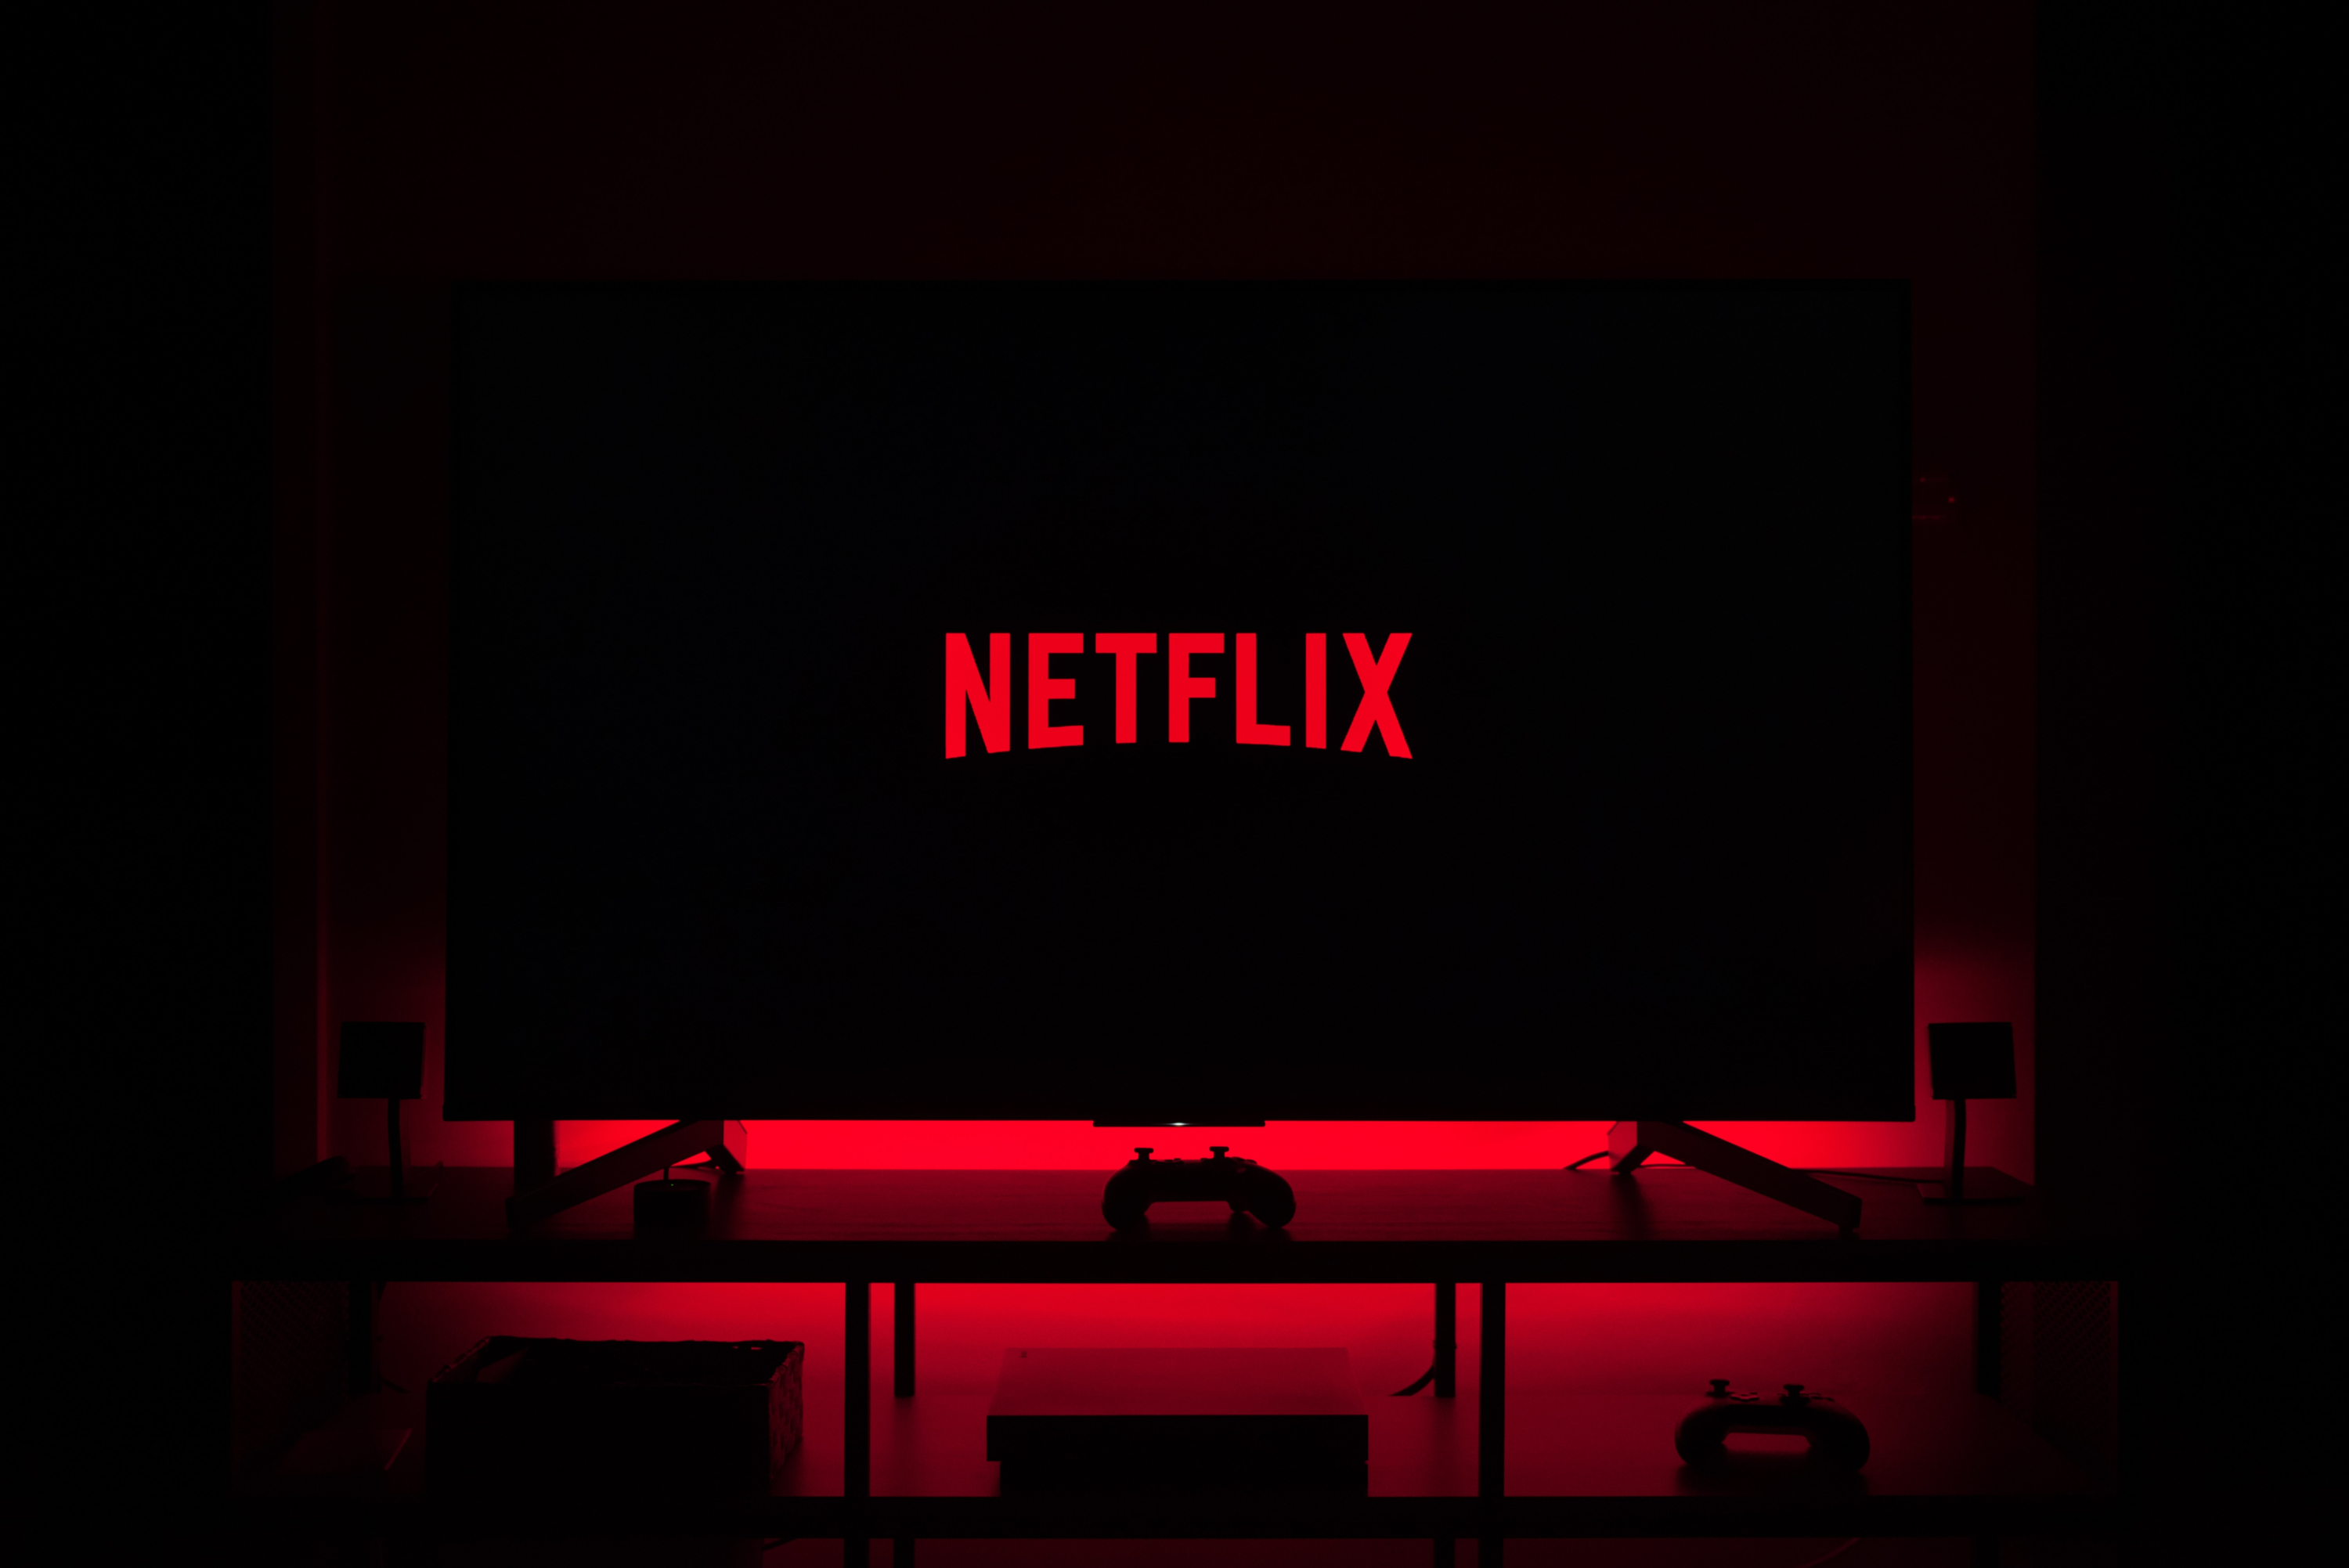

# Business Problem
Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

# Netflix Data Set

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

# The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

* Show_id: Unique ID for every Movie / Tv Show
* Type: Identifier - A Movie or TV Show
* Title: Title of the Movie / Tv Show
* Director: Director of the Movie
* Cast: Actors involved in the movie/show
* Country: Country where the movie/show was produced
* Date_added: Date it was added on Netflix
* Release_year: Actual Release year of the movie/show
* Rating: TV Rating of the movie/show
* Duration: Total Duration - in minutes or number of seasons
* Listed_in: Genre

# Objective of the case Study

# Basic Data Observation like data loading and importing packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('netflix.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
# no.of columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# find the  total rows and columns are present in the given data set.
df.shape

(8807, 12)

In [8]:
# it provides quick summary of the data set of how many rows and columns are present,data type,no of Non-NULL values and memory usage. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# nunique() method is used to count the no.of unique values in each column of the data frame.
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [10]:
df.shape

(8807, 12)

In [11]:
#missing value detection
missing_values=df.isnull()
missing_values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
missing_values=df.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
missing_values=df.isnull().any().any()
missing_values

True

# 1.2 statistical summary
Here we can see basic statistics in the data.

In [14]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [15]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [16]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [17]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include='number')
# We have only 'release_year' as a numeric feature
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [18]:
df['release_year'].min()

1925

In [19]:
df['release_year'].max()

2021

In [20]:
df['release_year'].mean()

2014.1801975701146

In [21]:
df['release_year'].std()

8.819312130833966

Content release year analysis looks like this;

* We have content that has been the released year 1925 to 2021.
* We have the mean year 2014
* We have a standard deviation of ~ 8.82 and this can show us; we have release_year data spreads from 1925 to 2021, probably we have outliers mostly from 1925 to 2014

In [22]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include='object')
categorical_features.describe()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [23]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include='object')
categorical_features.describe().T
# Here T as Transpose matrix interchage the rows and columns.

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# Data Cleaning

1. Null Value Analysis
2. Checking Dublicate Values
3. Handling inconsistent or incorrect data

In [24]:
df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [26]:
df.isnull().any().any()

True

<Axes: >

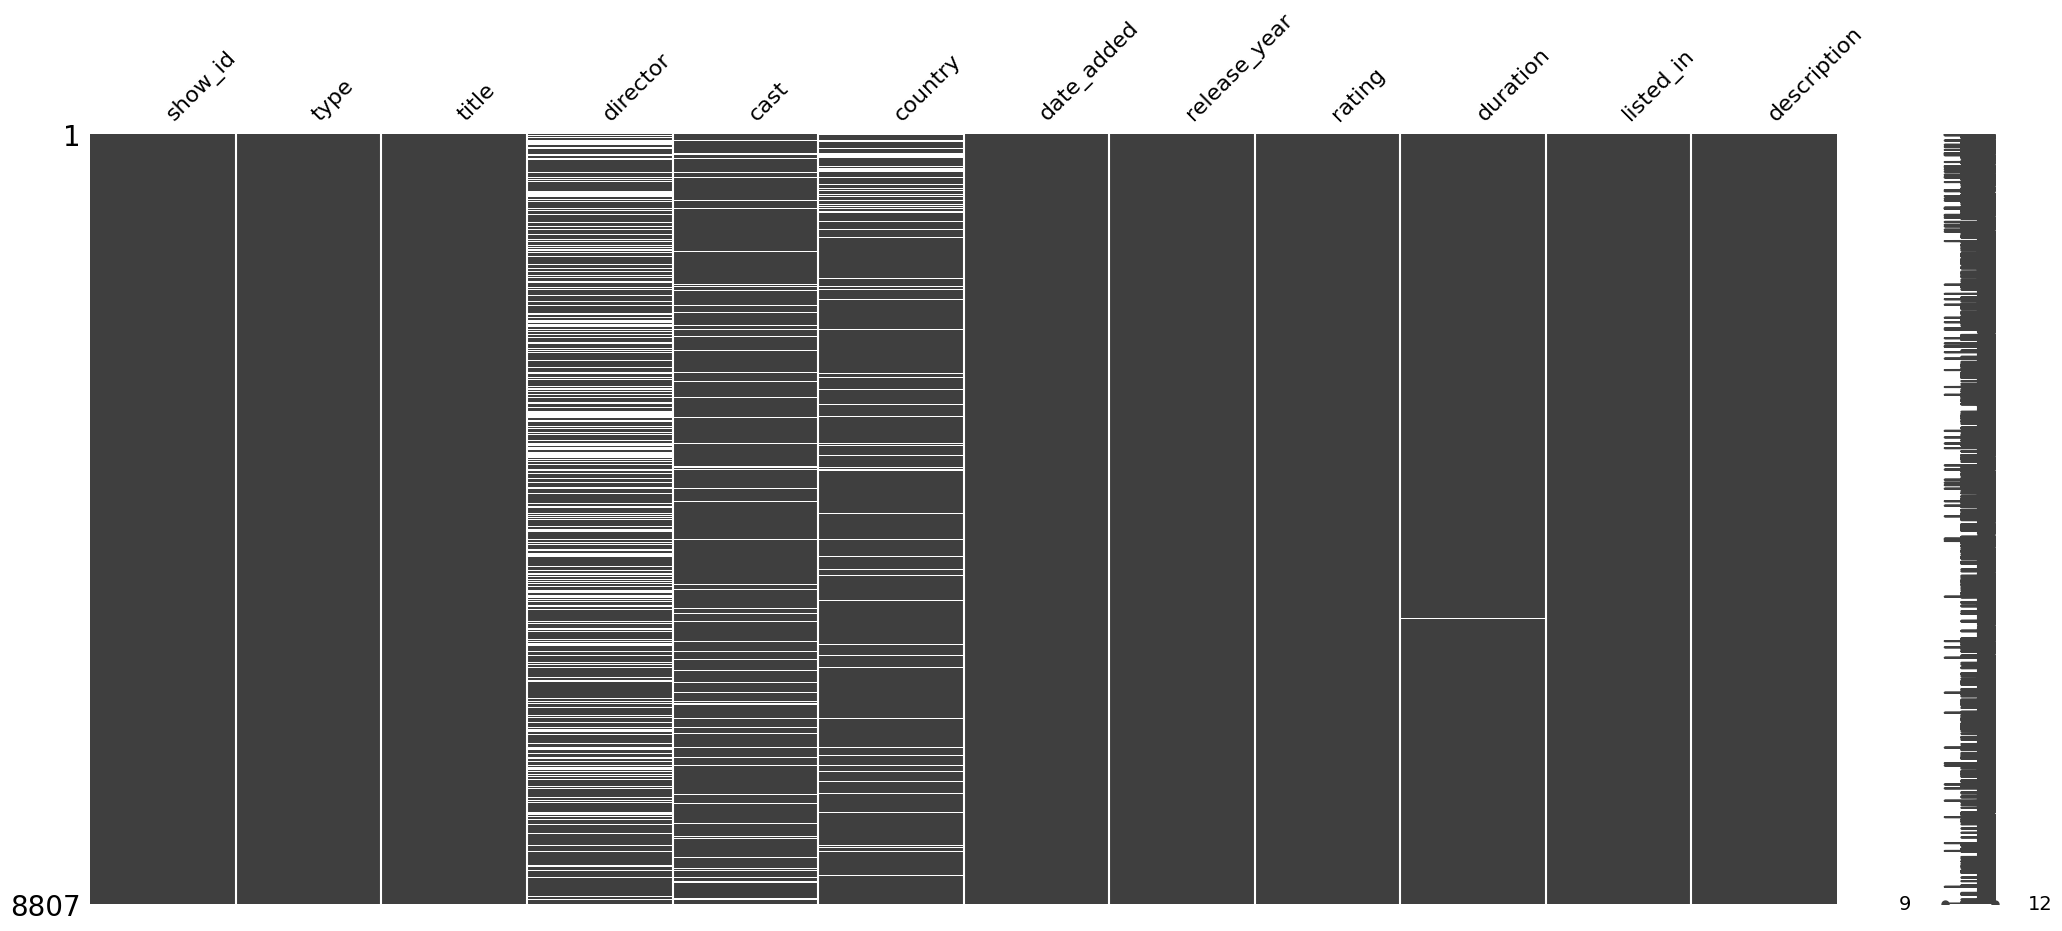

In [27]:
import missingno as msno
msno.matrix(df)

As we can see, the missing values now become much more apparent and clear when we visualize it. White bands shows us missing data values and dark gray ones are non-missing data.

* We're seeing that dataset a lot of missing director data,
* And we have missing data on cast and country
* We have some missing data on duration

In [28]:
null_columns = [col for col in df.columns if df[col].isnull().sum() > 0]

In [29]:
null_columns

['director', 'cast', 'country', 'date_added', 'rating', 'duration']

In [30]:
# count the null_values
null_counts = df[null_columns].isnull().sum().sort_values(ascending=True)
null_counts

duration         3
rating           4
date_added      10
cast           825
country        831
director      2634
dtype: int64

In [31]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [32]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [33]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [34]:
duration = df[df['duration'].isna()].index

In [35]:
df.loc[duration] = df.loc[duration].fillna(method = 'ffill' , axis = 1)

In [36]:
df.loc[duration ,'rating'] = 'Not Available'

In [37]:
df.loc[duration]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


In [38]:
rating = df[df.rating.isna()].index
rating

Int64Index([5989, 6827, 7312, 7537], dtype='int64')

In [39]:
df.loc[rating , 'rating'] = 'Not Available'

In [40]:
df.loc[rating]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [41]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [42]:
date_added = df[df.date_added.isna()].index
date_added

Int64Index([6066, 6174, 6795, 6806, 6901, 7196, 7254, 7406, 7847, 8182], dtype='int64')

In [43]:
df.loc[date_added , 'date_added'] = 'Not Available'
df.loc[date_added]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Not Available,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,Not Available,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,Not Available,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,Not Available,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,Not Available,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,Not Available,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,Not Available,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Not Available,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Not Available,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,Not Available,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [44]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [45]:
def missing_value_table(df, get_null_columns=False):
    # find columns that only have null values
    null_columns = [col for col in df.columns
                    if df[col].isnull().sum() > 0]
    
    # Null Value counts
    null_counts = df[null_columns].isnull().sum().sort_values(ascending=True)

    # Null Value Percentage
    null_value_rates = (df[null_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    formatted_null_value_rates = null_value_rates.apply(lambda value: f"% {str(np.round(value, 2))}")

    # Null Value Table
    null_df = pd.concat([null_counts, formatted_null_value_rates],
                        axis=1, keys=["Null Value Count", "Null Value Rates"])
    print(null_df, end="\n")

    if get_null_columns:
        return null_columns
    

missing_value_table(df)

          Null Value Count Null Value Rates
cast                   825           % 9.37
country                831           % 9.44
director              2634          % 29.91


In [46]:
columns_to_fill = missing_value_table(df, get_null_columns=True)
df[columns_to_fill] = df[columns_to_fill].fillna('missing')

          Null Value Count Null Value Rates
cast                   825           % 9.37
country                831           % 9.44
director              2634          % 29.91


In [47]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [48]:
df.shape

(8807, 12)

In [49]:
## Checking the Duplicated values
duplicated_rows=df[df.duplicated()]
print(f"duplicated_rows in the given data set :: {duplicated_rows.shape[0]}")

duplicated_rows in the given data set :: 0


In [50]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# 3.Data Exploration and Non Graphical Analysis

In [51]:
# 2 types of content present in dataset - either Movie or TV Show
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [52]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show'] 

In [53]:
movies.duration.value_counts()

90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [54]:
tv_shows.duration.value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [55]:
movies['duration'] = movies['duration'].str[:-3]
movies['duration'] = movies['duration'].astype('float')

C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\2710901692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str[:-3]
C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\2710901692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].astype('float')


In [56]:
tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows['duration'] = tv_shows['duration'].astype('float')

C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\2648744298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\2648744298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration'] = tv_shows['duration'].astype('float')


In [57]:
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\3956871887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\3956871887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)


In [58]:
tv_shows.duration_in_seasons

1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: duration_in_seasons, Length: 2676, dtype: float64

In [59]:
movies.duration_in_minutes

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_in_minutes, Length: 6131, dtype: float64

In [60]:
df.release_year.min() , df.release_year.max() 

(1925, 2021)

In [61]:
df.loc[(df.release_year == df.release_year.min()) | (df.release_year == df.release_year.max())].sort_values('release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,missing,missing,missing,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
966,s967,Movie,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,"April 28, 2021",2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane..."
967,s968,TV Show,Headspace Guide to Sleep,missing,Evelyn Lewis Prieto,missing,"April 28, 2021",2021,TV-G,1 Season,"Docuseries, Science & Nature TV",Learn how to sleep better with Headspace. Each...
968,s969,TV Show,Sexify,missing,"Aleksandra Skraba, Maria Sobocińska, Sandra Dr...",Poland,"April 28, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",To build an innovative sex app and win a tech ...
972,s973,TV Show,Fatma,missing,"Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...",Turkey,"April 27, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers","Reeling from tragedy, a nondescript house clea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
466,s467,TV Show,My Unorthodox Life,missing,missing,missing,"July 14, 2021",2021,TV-MA,1 Season,Reality TV,"Follow Julia Haart, Elite World Group CEO and ..."
467,s468,Movie,Private Network: Who Killed Manuel Buendía?,Manuel Alcalá,Daniel Giménez Cacho,missing,"July 14, 2021",2021,TV-MA,100 min,"Documentaries, International Movies",A deep dive into the work of renowned Mexican ...
468,s469,Movie,The Guide to the Perfect Family,Ricardo Trogi,"Louis Morissette, Émilie Bierre, Catherine Cha...",missing,"July 14, 2021",2021,TV-MA,102 min,"Comedies, Dramas, International Movies","A couple in Québec deals with the pitfalls, pr..."
471,s472,Movie,Day of Destiny,"Akay Mason, Abosi Ogba","Olumide Oworu, Denola Grey, Gbemi Akinlade, Ji...",missing,"July 13, 2021",2021,TV-PG,110 min,"Children & Family Movies, Dramas, Internationa...","With their family facing financial woes, two t..."


In [62]:
#Which are different ratings available on Netflix in each type of content? Check the number of content released in each type.
df.groupby(['type' , 'rating'])['show_id'].count()

type     rating       
Movie    G                  41
         NC-17               3
         NR                 75
         Not Available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
         UR                  3
TV Show  NR                  5
         Not Available       2
         R                   2
         TV-14             733
         TV-G               94
         TV-MA            1145
         TV-PG             323
         TV-Y              176
         TV-Y7             195
         TV-Y7-FV            1
Name: show_id, dtype: int64

In [63]:
#Working on the columns having maximum null values and the columns having comma separated multiple values for each record
#Country column

In [64]:
df['country'].value_counts()

United States                             2818
India                                      972
missing                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [65]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb.dropna(inplace = True)
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))
country_tb = country_tb.explode('country')
country_tb

C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\679330132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_tb.dropna(inplace = True)
C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\679330132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))


,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
2,s3,TV Show,missing
3,s4,TV Show,missing
4,s5,TV Show,India
...,...,...,...
8802,s8803,Movie,United States
8803,s8804,TV Show,missing
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [66]:
# some duplicate values are found, which have unnecessary spaces. some empty strings found
country_tb['country'] = country_tb['country'].str.strip()

In [67]:
country_tb.loc[country_tb['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [68]:
country_tb = country_tb.loc[country_tb['country'] != '']

In [69]:
country_tb['country'].nunique()
# Netflix has movies from the total 122 countries.

123

In [70]:
# Total movies and tv shows in each country
x = country_tb.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752.0,938.0
India,962.0,84.0
United Kingdom,534.0,272.0
missing,440.0,391.0
Canada,319.0,126.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


In [71]:
df['director'].value_counts()

missing                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

In [72]:
dir_tb = df[['show_id' , 'type' , 'director']]
dir_tb.dropna(inplace = True)
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(','))
dir_tb

C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\2245723733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_tb.dropna(inplace = True)
C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\2245723733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(','))


,show_id,type,director
0,s1,Movie,[Kirsten Johnson]
1,s2,TV Show,[missing]
2,s3,TV Show,[Julien Leclercq]
3,s4,TV Show,[missing]
4,s5,TV Show,[missing]
...,...,...,...
8802,s8803,Movie,[David Fincher]
8803,s8804,TV Show,[missing]
8804,s8805,Movie,[Ruben Fleischer]
8805,s8806,Movie,[Peter Hewitt]


In [73]:
dir_tb = dir_tb.explode('director')
dir_tb['director'] = dir_tb['director'].str.strip()
dir_tb.director.apply(lambda x : True if len(x) == 0 else False).value_counts()

False    9612
Name: director, dtype: int64

In [74]:
dir_tb

,show_id,type,director
0,s1,Movie,Kirsten Johnson
1,s2,TV Show,missing
2,s3,TV Show,Julien Leclercq
3,s4,TV Show,missing
4,s5,TV Show,missing
...,...,...,...
8802,s8803,Movie,David Fincher
8803,s8804,TV Show,missing
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [75]:
dir_tb['director'].nunique()

4994

 * so Here total 4994 unique directors in the dataset.
 
 * Here we can see the movies and tv shows directed by each director.

In [76]:
x = dir_tb.groupby(['director' , 'type'])['show_id'].count().reset_index()
x.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('Movie' ,ascending = False)

type,Movie,TV Show
director,,
missing,188.0,2446.0
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


In [77]:
genre_tb = df[['show_id' , 'type', 'listed_in']]
genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(','))
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()

C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\284973385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(','))


In [78]:
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [79]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [80]:
genre_tb.listed_in.nunique()

42

In [81]:
df.merge(genre_tb , on = 'show_id' ).groupby(['type_y'])['listed_in_y'].nunique()

type_y
Movie      20
TV Show    22
Name: listed_in_y, dtype: int64

In [82]:
# total movies/TV shows in each genre
x = genre_tb.groupby(['listed_in' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'listed_in' , columns = 'type' , values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,176.0
British TV Shows,NaN,253.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,28.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,470.0


In [83]:
cast_tb = df[['show_id' , 'type' ,'cast']]
cast_tb.dropna(inplace = True)
cast_tb['cast'] = cast_tb['cast'].apply(lambda x : x.split(','))
cast_tb = cast_tb.explode('cast')
cast_tb

C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\2268781787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_tb.dropna(inplace = True)
C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\2268781787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_tb['cast'] = cast_tb['cast'].apply(lambda x : x.split(','))


,show_id,type,cast
0,s1,Movie,missing
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [84]:
cast_tb['cast'] = cast_tb['cast'].str.strip()
# checking empty strings
cast_tb[cast_tb['cast'] == '']

,show_id,type,cast


In [85]:
# Total actors on the Netflix
cast_tb.cast.nunique()

36440

In [86]:
# Total movies/TV shows by each actor
x = cast_tb.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)

type,Movie,TV Show
cast,,
missing,475.0,350.0
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Ai Kayano,2.0,17.0
Junichi Suwabe,4.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


# Visual Analysis - Univariate, Bivariate after pre-processing of the data

* Distribution of content across the different content in the given dataset.

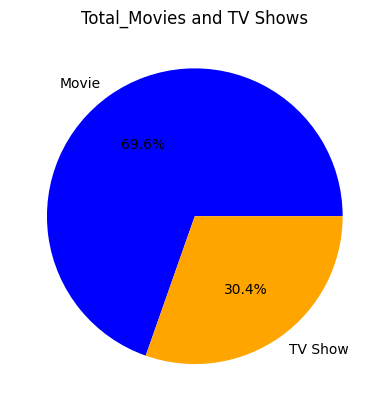

In [87]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['blue' , 'orange'])
plt.title('Total_Movies and TV Shows')
plt.show()

* Here we can see around 70% content is movies and 30% content is releated to TV shows.

In [88]:
df.shape

(8807, 12)

Text(0.5, 1.0, 'Distribution of duration of movies')

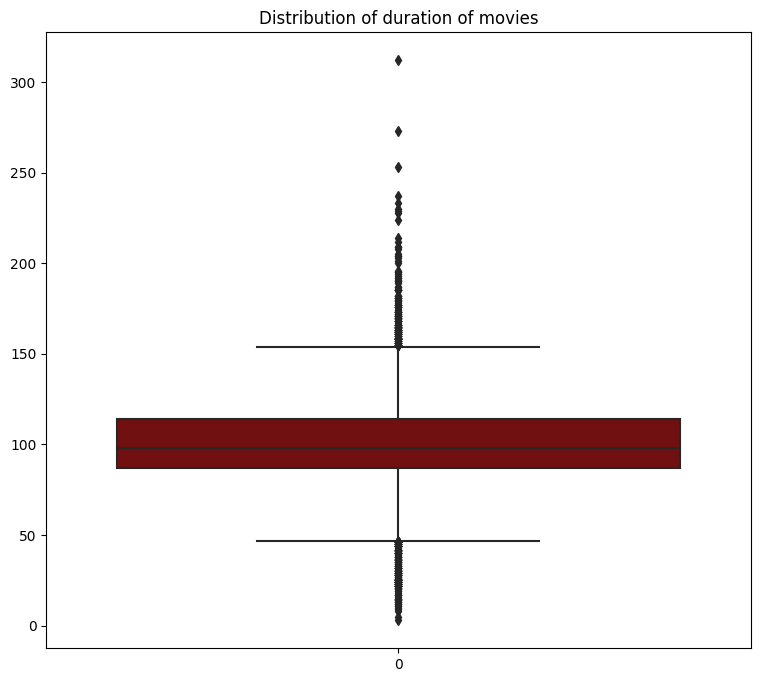

In [89]:
plt.figure(figsize=(20,8))
duration_df = df.loc[df["duration"].str.contains("min")== True]["duration"].apply(lambda x: x.split()[0]).astype(int)  # splting the movies duration as its type is string , extracting the numeri value and converting it into int type
plt.subplot(1,2,1) #subplots to make the data look easy for comparison.
sns.boxplot(duration_df , color = "maroon")
plt.title("Distribution of duration of movies")

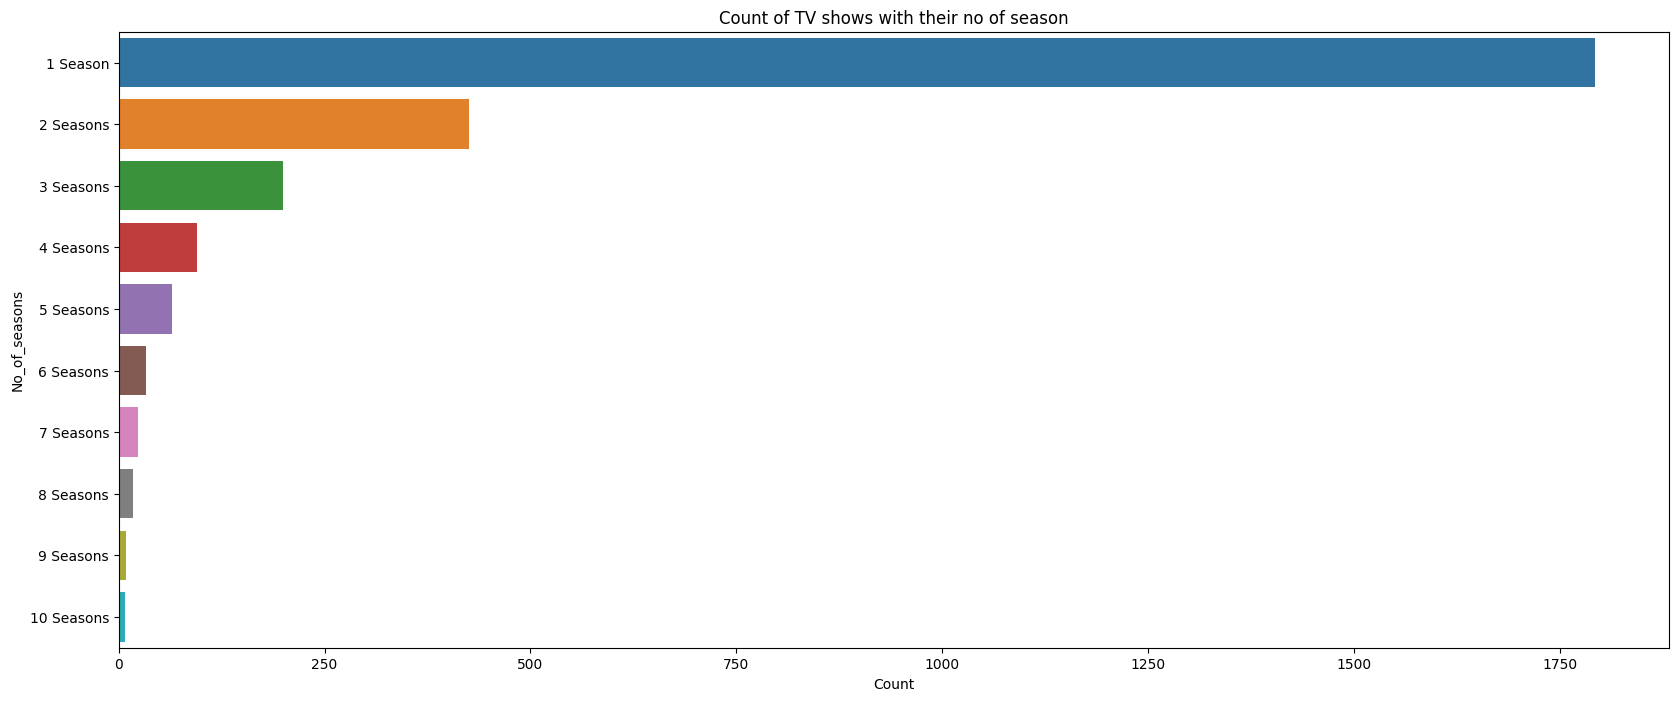

In [90]:

df_TV_season = df.loc[df["duration"].str.contains("Season")== True , "duration" ].value_counts().reset_index()[:10]  #filtering out top 10 values of TV shows using string. 
df_TV_season.rename(columns = {"index" : "No_of_seasons" , "duration" : "Count"}, inplace = True) #renaming the columns 
plt.figure(figsize=(20,8))
sns.barplot(y = "No_of_seasons" , x = "Count" , data = df_TV_season)
plt.title("Count of TV shows with their no of season")
plt.show()

In [91]:
d = df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d


,type,release_year,total movies/TV shows
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


In [92]:
x = dir_tb.director.value_counts()
x

missing           2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: director, Length: 4994, dtype: int64

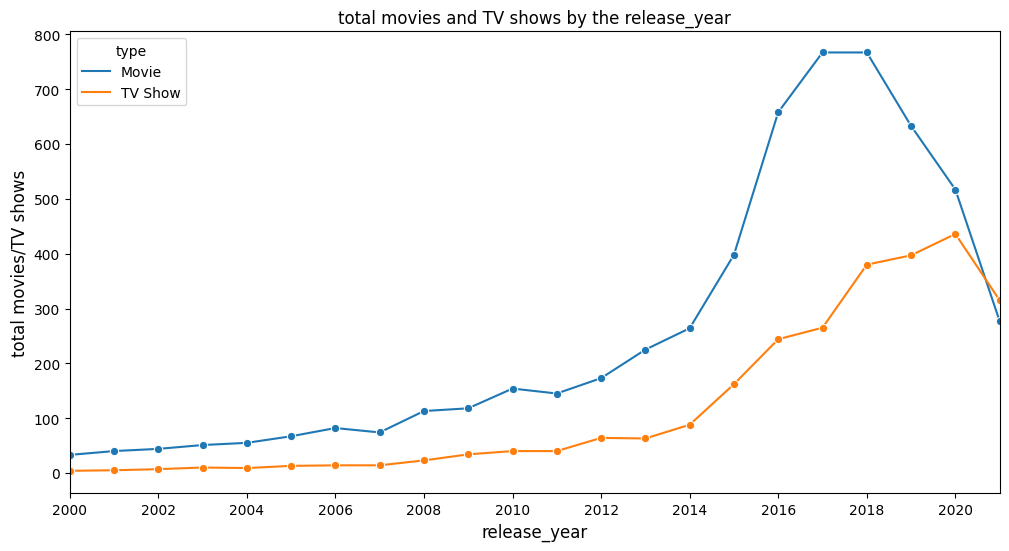

In [93]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o'  , ms = 6 )
plt.xlabel('release_year' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()

# Bivariate Analysis

In [94]:
df_datetime = pd.DataFrame(df)

In [95]:
df_datetime

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,missing,missing,missing,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [96]:
print(df['date_added'].dtype)


object


In [97]:
problematic_value = df.loc[1439, 'date_added']
print(problematic_value)


January 5, 2021


In [98]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')



In [99]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [100]:
df.shape

(8807, 12)

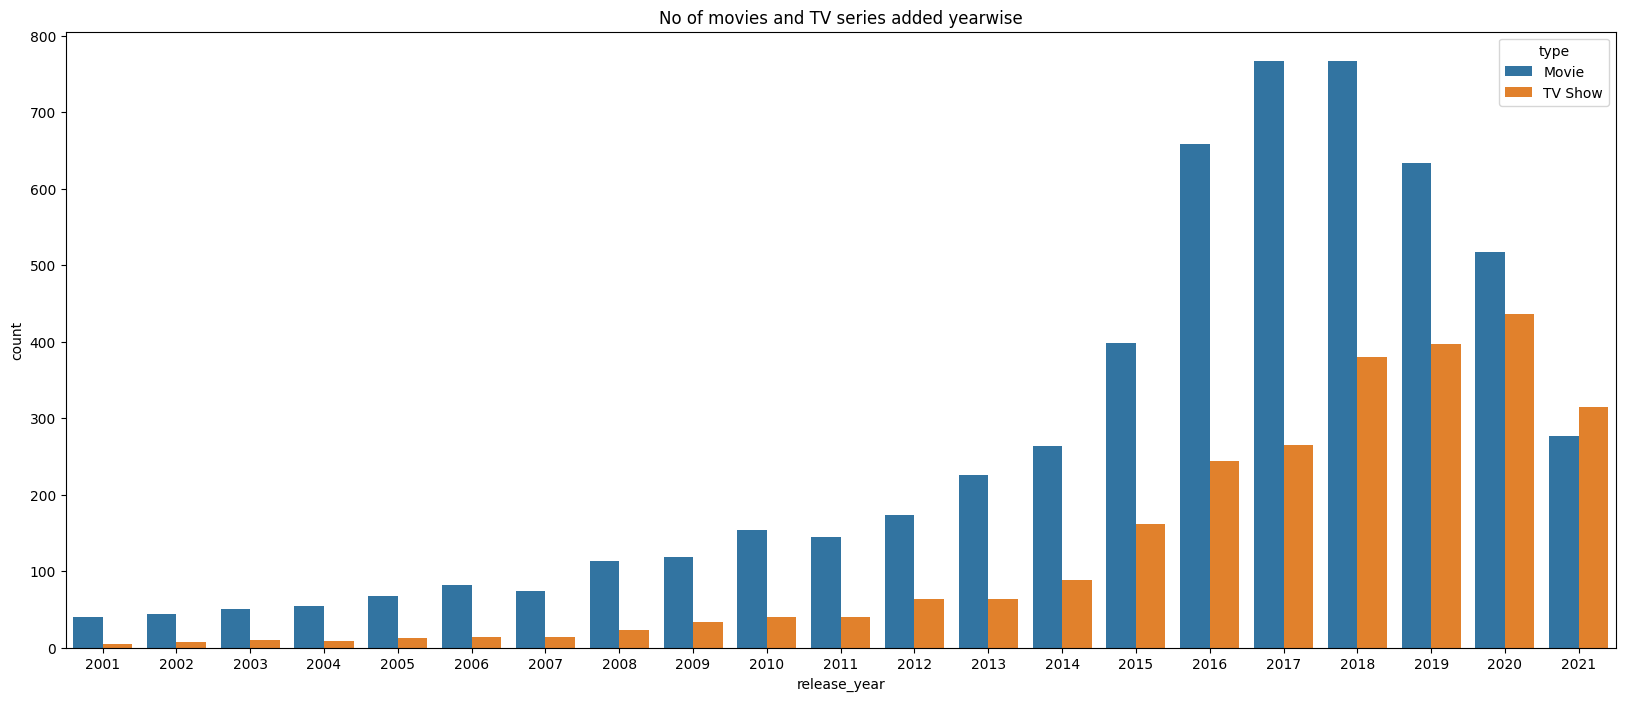

In [101]:
plt.figure(figsize=(20,8))
df_year = df.loc[df['release_year']>2000] #used masked to get out data for movies and TV shows released after 2000
sns.countplot(x='release_year', data = df_year, hue='type')
plt.title("No of movies and TV series added yearwise")
plt.show()
     

PG-13 -----> Parental Guidance with Adult Themes[Parental Guidance]
TV-MA -----> Mature Audience[Only for Adults]
PG -----> Parental Guidance without Adult Themes[Parental Guidance]
TV-14 -----> Contents with Parents strongly cautioned.
TV-PG -----> Parental guide suggested[Parental Guidance]
TV-Y -----> Children suited content[General Audience & Kids]
TV-Y7 -----> Children of age 7 and older[General Audience & Kids]
R -----> Strictly for Adults[Only for Adults]
TV-G -----> Suitable for all audiences[General Audience & Kids]
G -----> General Audience films[General Audience & Kids]
NC-17 -----> No one seventeen and under admitted[Only for Adults]
NR -----> Not rated movies[Not Rated]
TV-Y7-FV -----> Children of age 7 and older with fantasy violence[General Audience & Kids]
UR -----> recut version of rated movie[Not Rated]


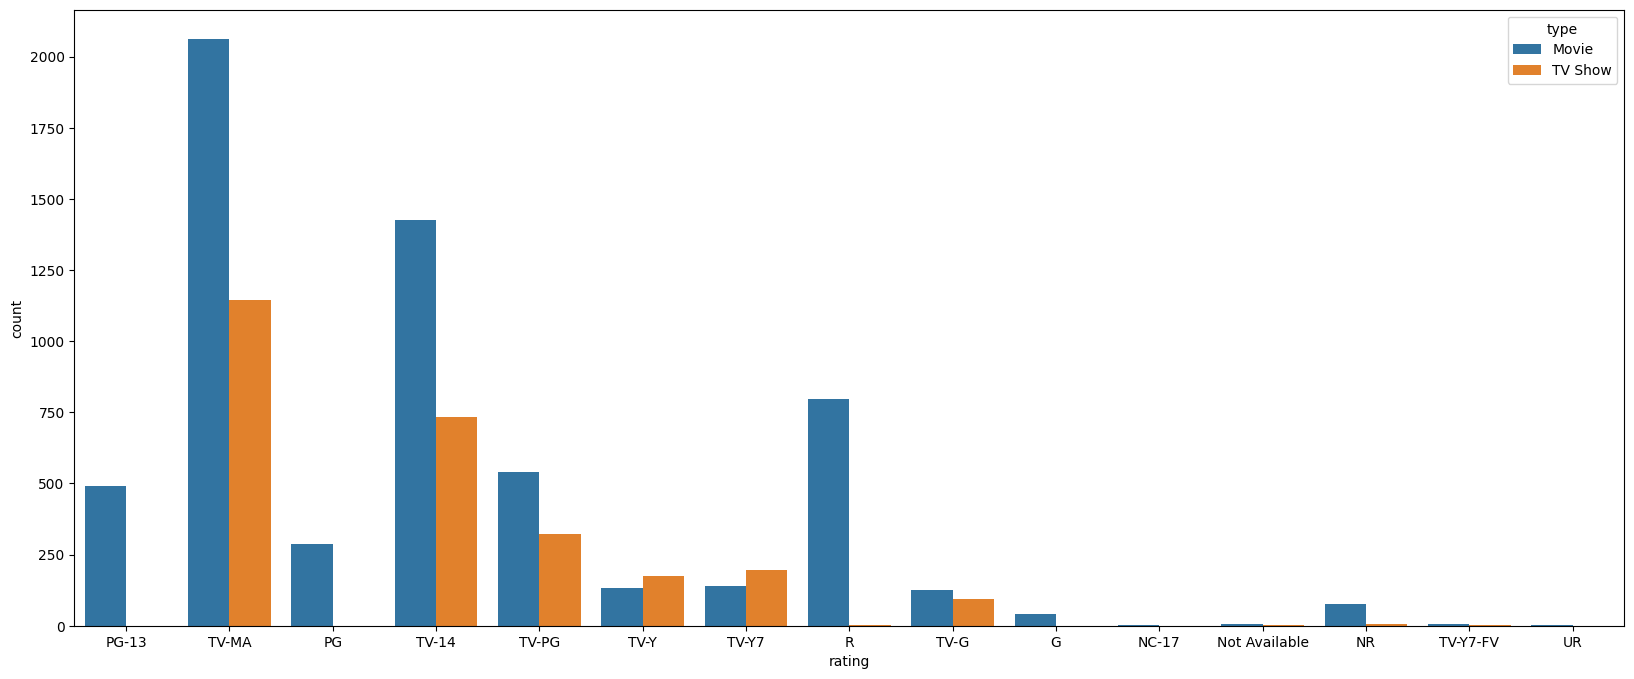

In [102]:

print('PG-13 -----> Parental Guidance with Adult Themes[Parental Guidance]',
'TV-MA -----> Mature Audience[Only for Adults]',
'PG -----> Parental Guidance without Adult Themes[Parental Guidance]',
'TV-14 -----> Contents with Parents strongly cautioned.',
'TV-PG -----> Parental guide suggested[Parental Guidance]',
'TV-Y -----> Children suited content[General Audience & Kids]',
'TV-Y7 -----> Children of age 7 and older[General Audience & Kids]',
'R -----> Strictly for Adults[Only for Adults]',
'TV-G -----> Suitable for all audiences[General Audience & Kids]',
'G -----> General Audience films[General Audience & Kids]',
'NC-17 -----> No one seventeen and under admitted[Only for Adults]',
'NR -----> Not rated movies[Not Rated]',
'TV-Y7-FV -----> Children of age 7 and older with fantasy violence[General Audience & Kids]',
'UR -----> recut version of rated movie[Not Rated]', sep = '\n')

df_rating = df[df["rating"].isnull()== False]
df_rating.reset_index(inplace = True)
plt.figure(figsize=(20,8))
sns.countplot(x ="rating" , data = df_rating , hue = "type")
plt.show()

In [103]:
top_10_country = country_tb.country.value_counts().head(10).index
country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

C:\Users\rampe\AppData\Local\Temp\ipykernel_16848\3637403756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )


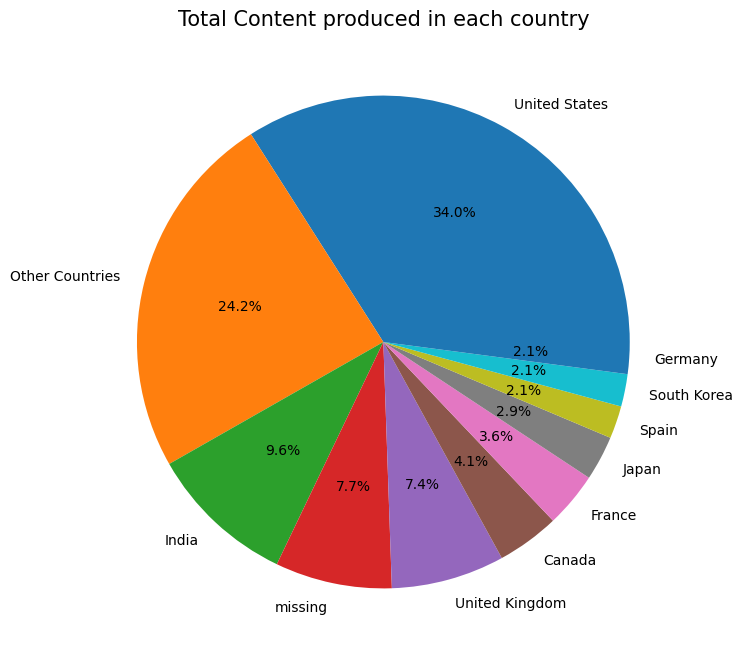

In [104]:
x = country_tb.cat.value_counts()

plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

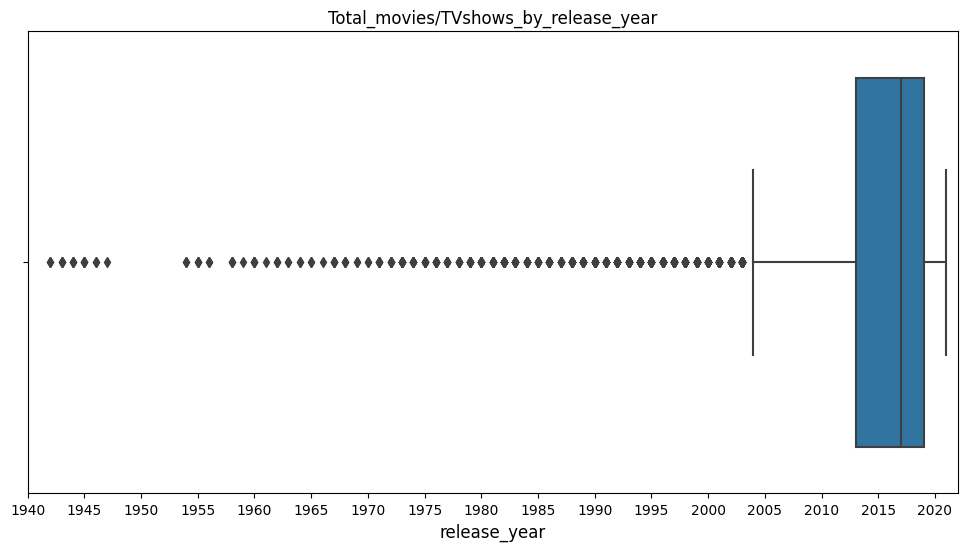

In [105]:
# total content distribution by release year of the content.
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

* Netflix have major content which is released in the year range 2000-2021
* It seems that the content older than year 2000 is almost missing from the Netflix.
* 4.7 Total movies/TV shows distribution by rating of the content

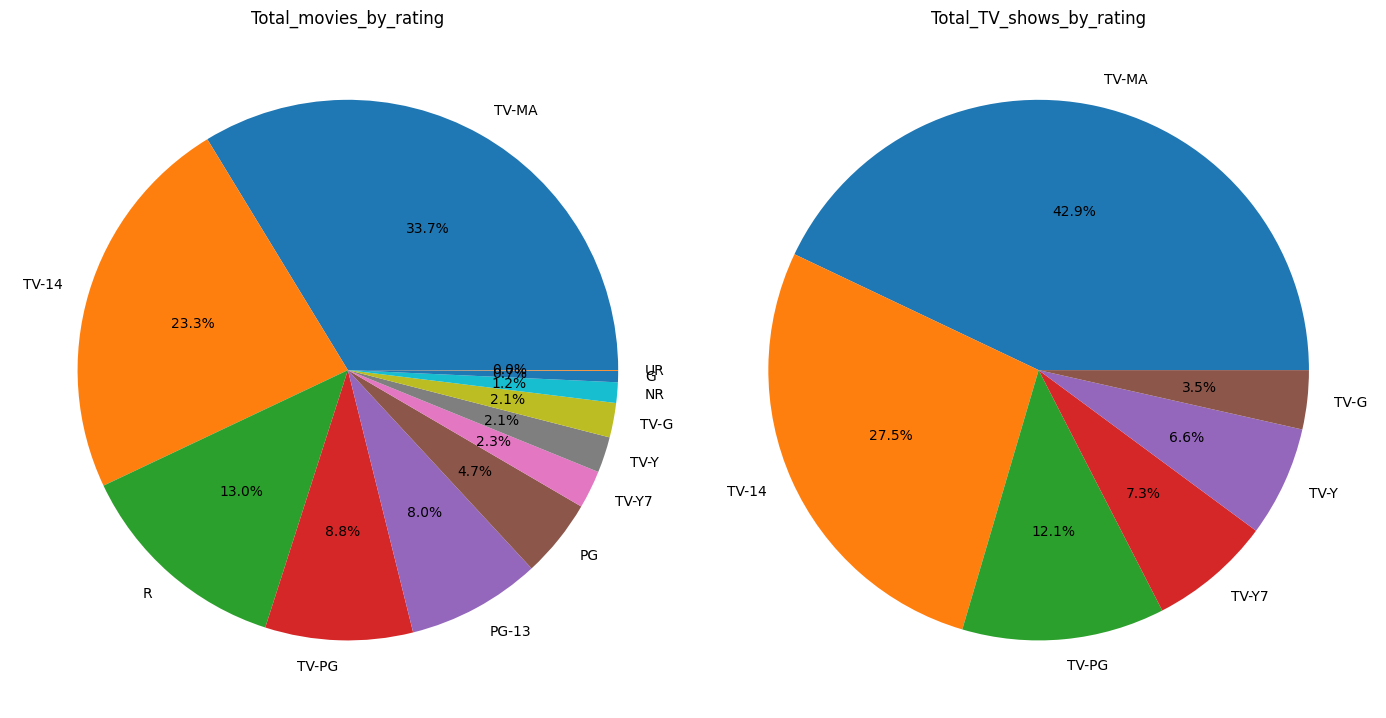

In [106]:
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.tight_layout()
plt.show()

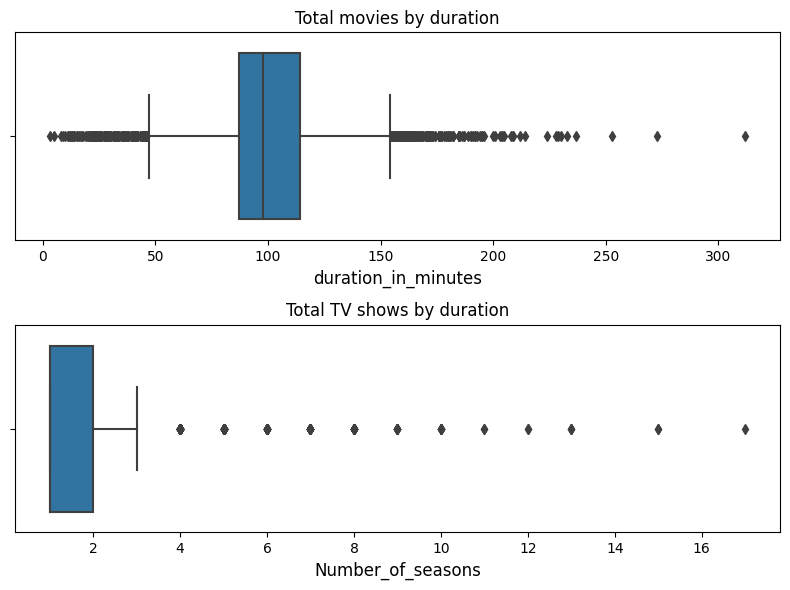

In [107]:
fig, ax = plt.subplots(2,1, figsize=(8,6))

sns.boxplot (data = movies , x = 'duration_in_minutes' ,ax =ax[0])
ax[0].set_xlabel('duration_in_minutes' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')

sns.boxplot (data = tv_shows , x = 'duration_in_seasons' , ax = ax[1])
ax[1].set_xlabel('Number_of_seasons' ,  fontsize = 12)
ax[1].set_title('Total TV shows by duration')

plt.tight_layout()
plt.show()

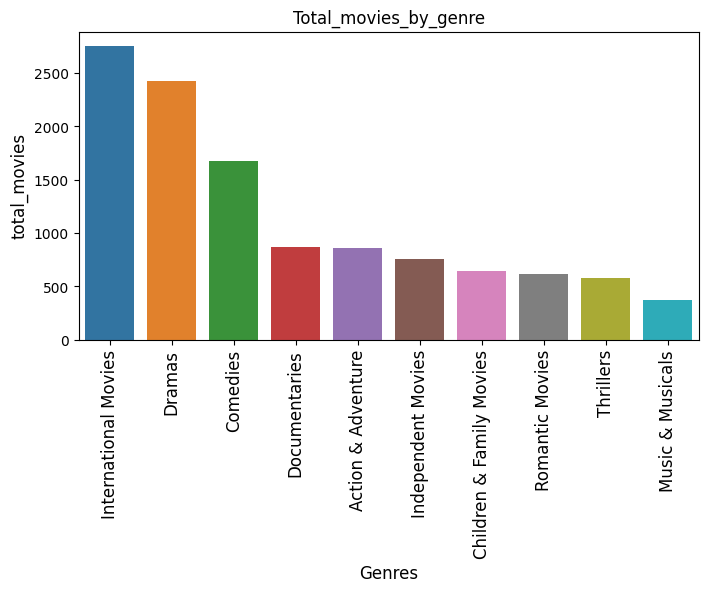

In [108]:
top_10_movie_genres = genre_tb[genre_tb['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre_tb.loc[genre_tb['listed_in'].isin(top_10_movie_genres)]
top_10_TV_genres = genre_tb[genre_tb['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre_tb.loc[genre_tb['listed_in'].isin(top_10_TV_genres)]
plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

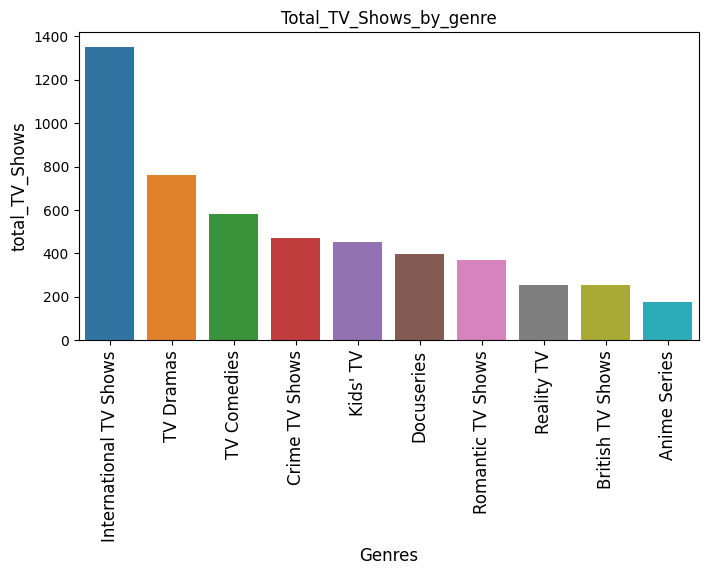

In [109]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

Text(0.5, 1.0, 'Countries V/s Genres')

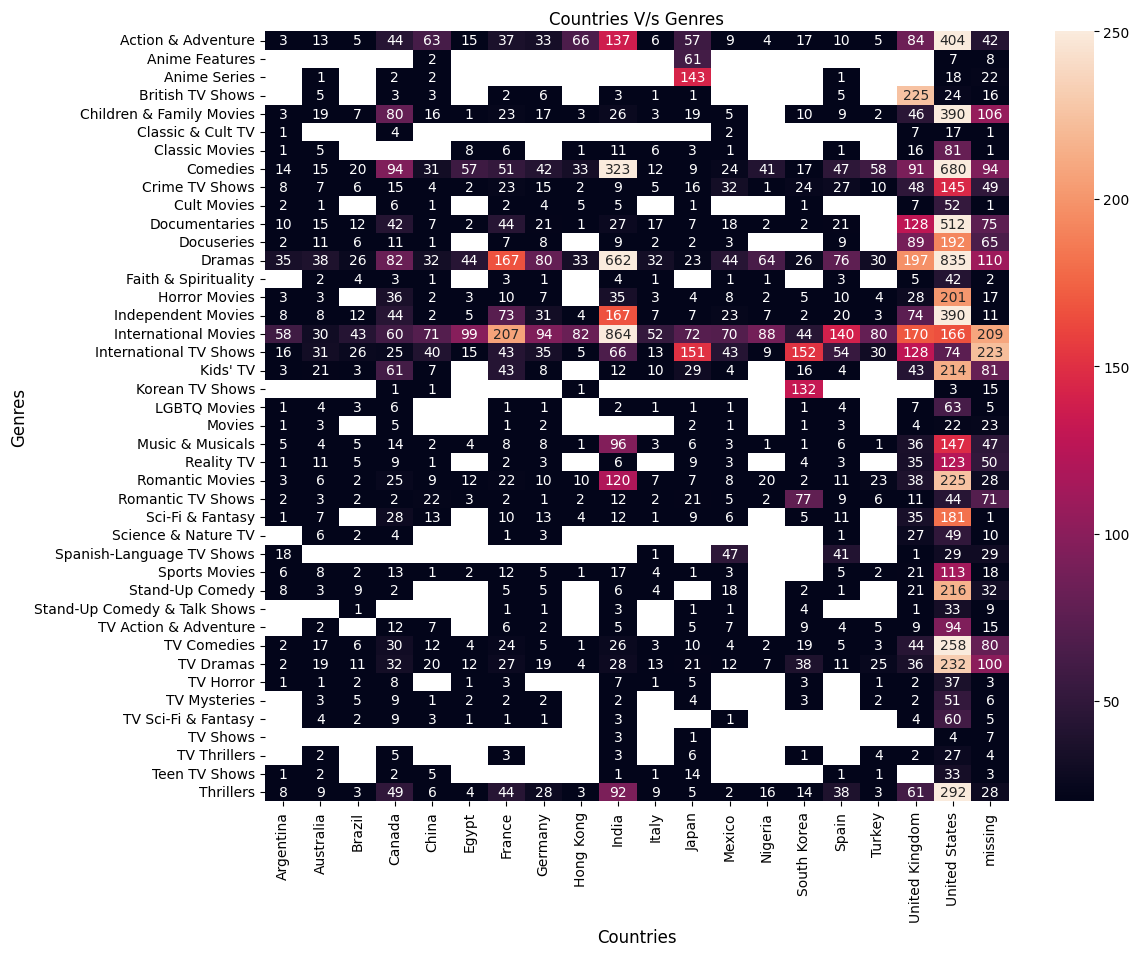

In [110]:
top_20_country = country_tb.country.value_counts().head(20).index
top_20_country = country_tb.loc[country_tb['country'].isin(top_20_country)]
x = top_20_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

Text(0.5, 1.0, 'Countries V/s Rating')

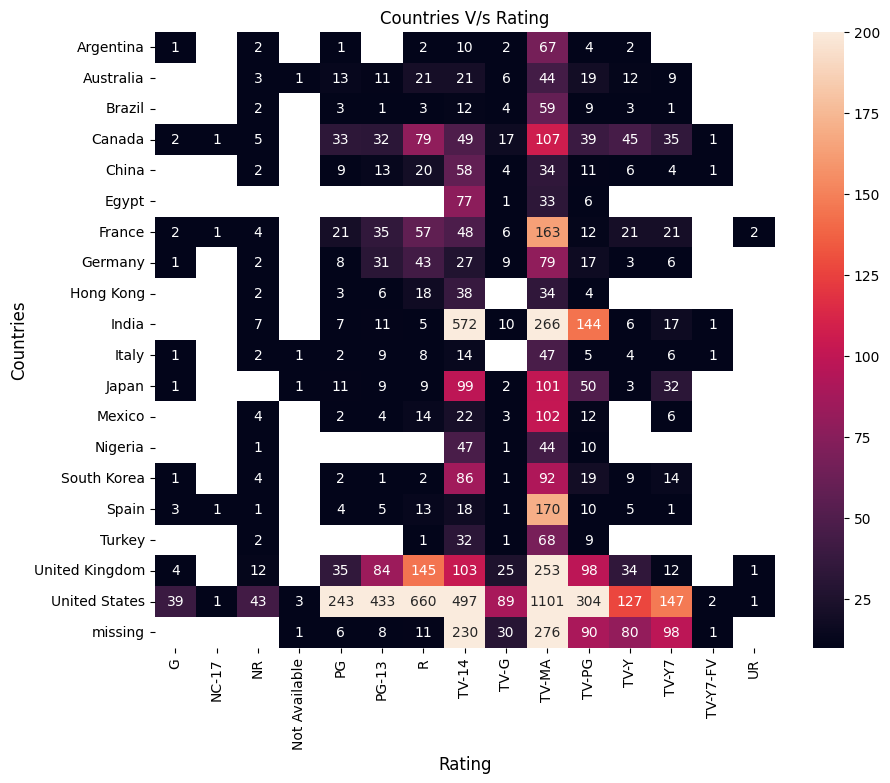

In [111]:
x = top_20_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

Overall, Netflix has an large amount of adult content across all countries (TV-MA & TV-14).
India also has many titles rated TV-PG, other than TV-MA & TV-14.
Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).
There is scarce content for general audience (TV-G & G) across all countries except US.

# 5.3 The top actors by country

In [112]:
x = cast_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

,country,cast,show_id
50771,United States,missing,407
49499,United States,Tara Strong,22
48424,United States,Samuel L. Jackson,22
40546,United States,Fred Tatasciore,21
35811,United States,Adam Sandler,20


In [113]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)
    
# top 5 actors in top countries and their movies/tv shows count
top_5_actors

,country,cast,show_id
0,United States,missing,407
1,United States,Tara Strong,22
2,United States,Samuel L. Jackson,22
3,United States,Fred Tatasciore,21
4,United States,Adam Sandler,20
5,India,Anupam Kher,40
6,India,missing,39
7,India,Shah Rukh Khan,34
8,India,Naseeruddin Shah,31
9,India,Akshay Kumar,29


<Axes: xlabel='show_id', ylabel='cast'>

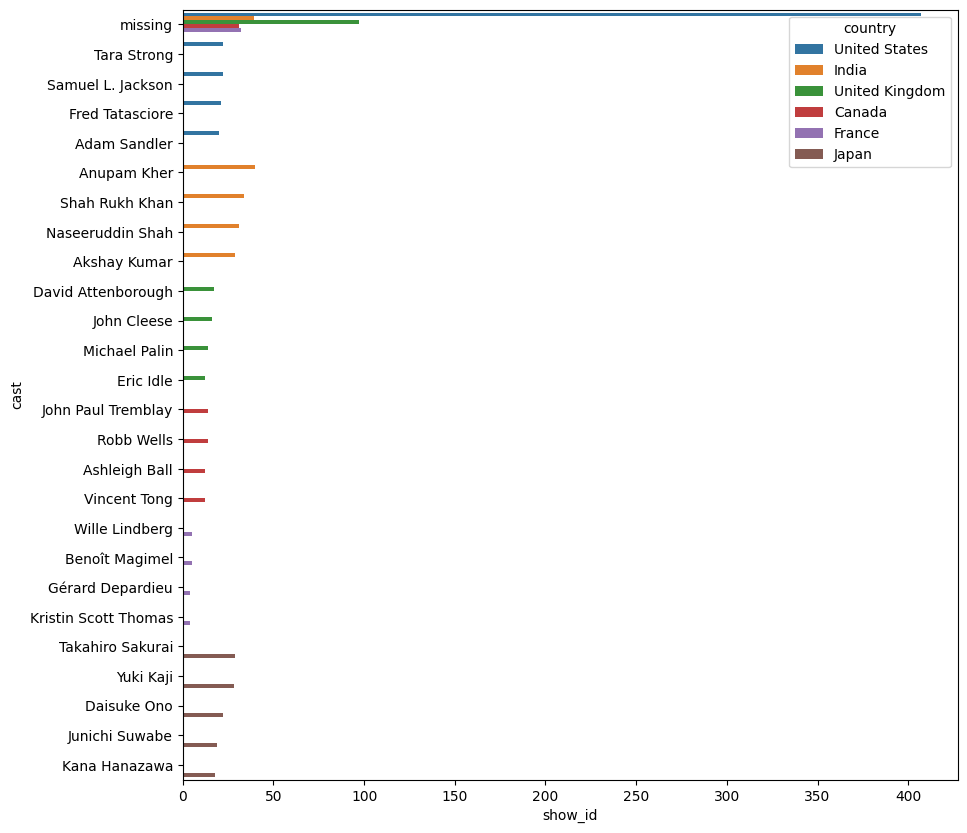

In [114]:
plt.figure(figsize = (10,10))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')

In [115]:
# Top 5 directors by genre.
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']

x = dir_tb.merge(genre_tb , on = 'show_id').groupby([ 'listed_in' , 'director',])['show_id'].count().reset_index()

top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])
    
top_5_dir

,listed_in,director,show_id
147,Action & Adventure,Don Michael Paul,9
703,Action & Adventure,missing,8
651,Action & Adventure,Toshiya Shinohara,7
550,Action & Adventure,S.S. Rajamouli,7
215,Action & Adventure,Hidenori Inoue,7
1358,Children & Family Movies,missing,36
1219,Children & Family Movies,Rajiv Chilaka,22
1307,Children & Family Movies,Suhas Kadav,16
1215,Children & Family Movies,Prakash Satam,7
1245,Children & Family Movies,Robert Rodriguez,7


In [116]:
x = genre_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)

In [117]:
top_5_genre

,country,listed_in,show_id
0,United States,Dramas,835
1,United States,Comedies,680
2,United States,Documentaries,512
3,United States,Action & Adventure,404
4,United States,Independent Movies,390
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


In [118]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [119]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [120]:
df['month_added'] = df['date_added'].dt.month

# Display the updated DataFrame
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          missing   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          missing   
4         s5  TV Show           Kota Factory          missing   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          missing   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               missing  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [121]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0
8803,s8804,TV Show,Zombie Dumb,missing,missing,missing,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0


Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

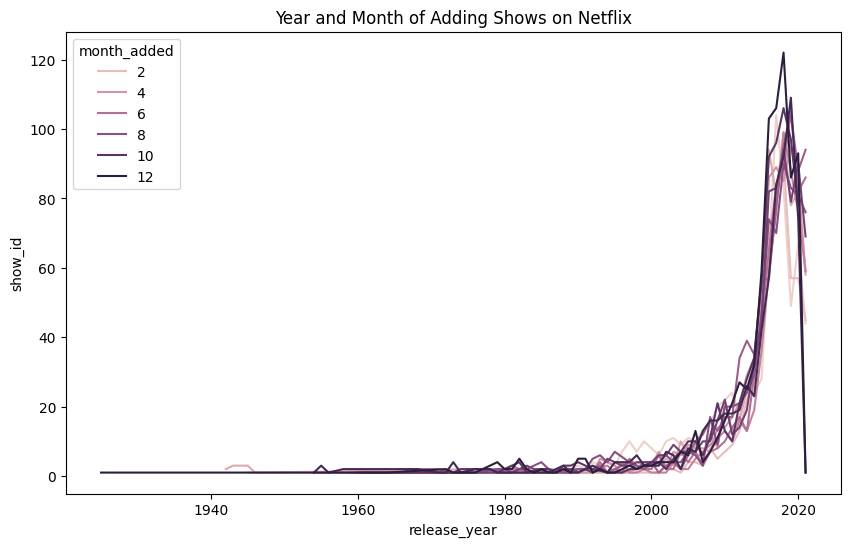

In [122]:
month_year = df.groupby(['release_year' , 'month_added'])['show_id'].count().reset_index()
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'release_year', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')

In [123]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added'],
      dtype='object')

In [124]:
country_list = country_tb.country.value_counts().head(12).index
top_12_country = country_tb.loc[country_tb['country'].isin(country_list)]
country_year = top_12_country.merge(df , on = 'show_id')[['show_id','country_x' ,'type_x' , 'release_year' ]]
country_year.columns = ['show_id', 'country', 'type', 'release_year']

In [125]:
country_year = country_year.groupby(['country' , 'release_year'])['show_id'].count().reset_index()

<Axes: xlabel='release_year', ylabel='show_id'>

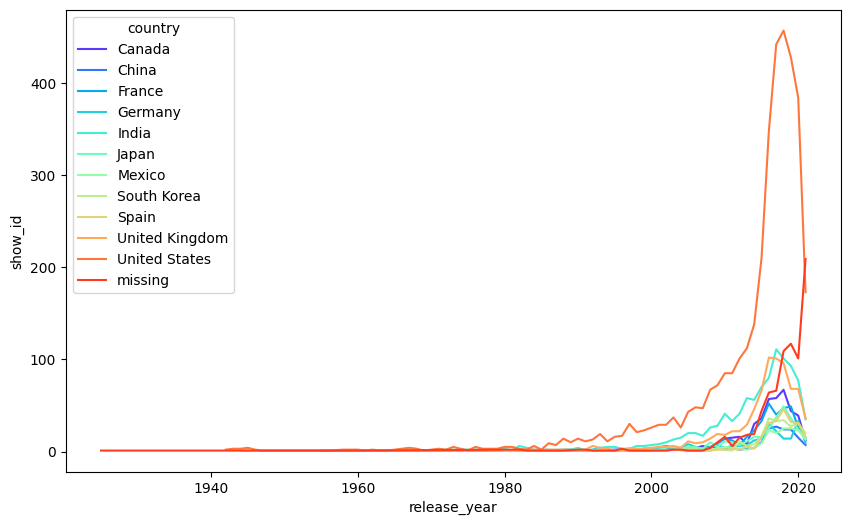

In [126]:
plt.figure(figsize = (10,6))
sns.lineplot(data = country_year , x = 'release_year' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

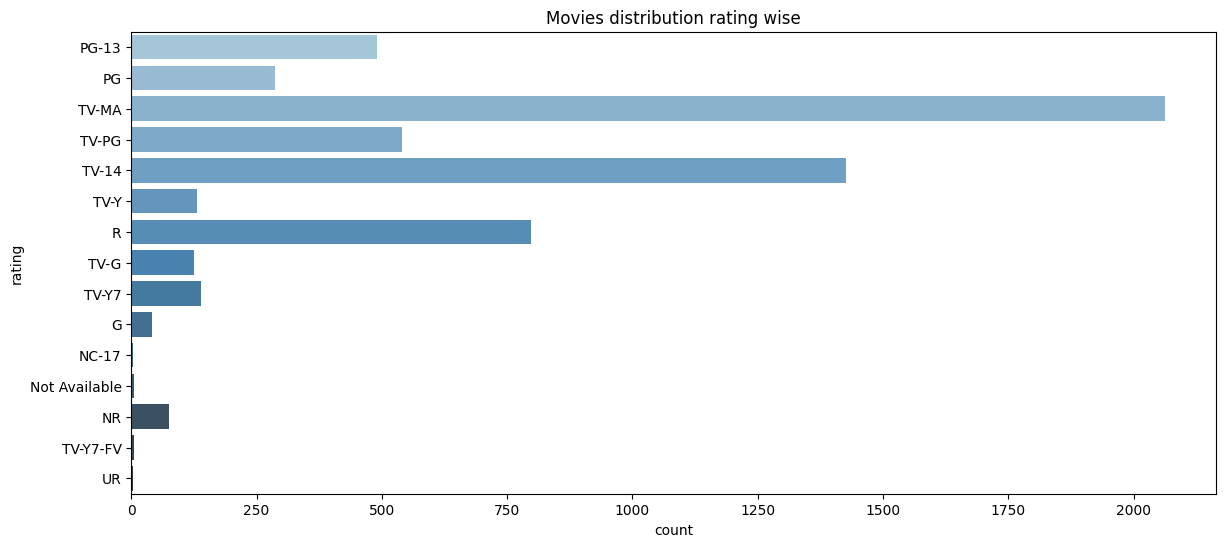

In [127]:

plt.figure(figsize=(14,6))
movies_ratingwise = df.loc[df["type"] == "Movie" , ["type" , "rating"]]
sns.countplot( y="rating" , data =movies_ratingwise,  palette="Blues_d" )
plt.title("Movies distribution rating wise")
plt.show()

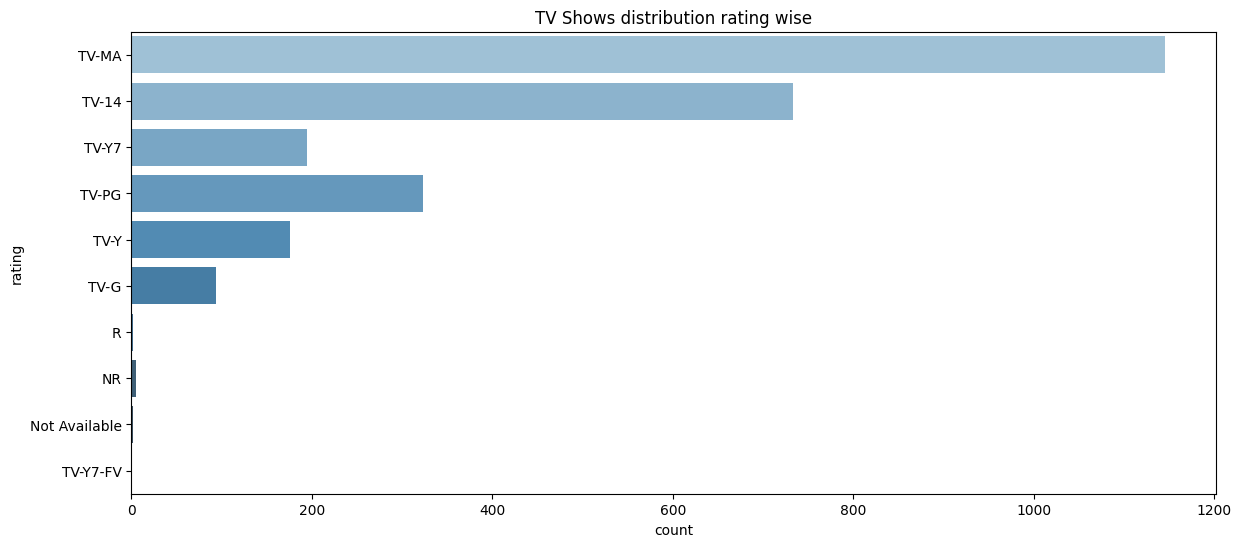

In [128]:

plt.figure(figsize=(14,6))
movies_ratingwise = df.loc[df["type"] == "TV Show" , ["type" , "rating"]]
sns.countplot( y="rating" , data =movies_ratingwise,  palette="Blues_d" )
plt.title("TV Shows distribution rating wise")
plt.show()
     

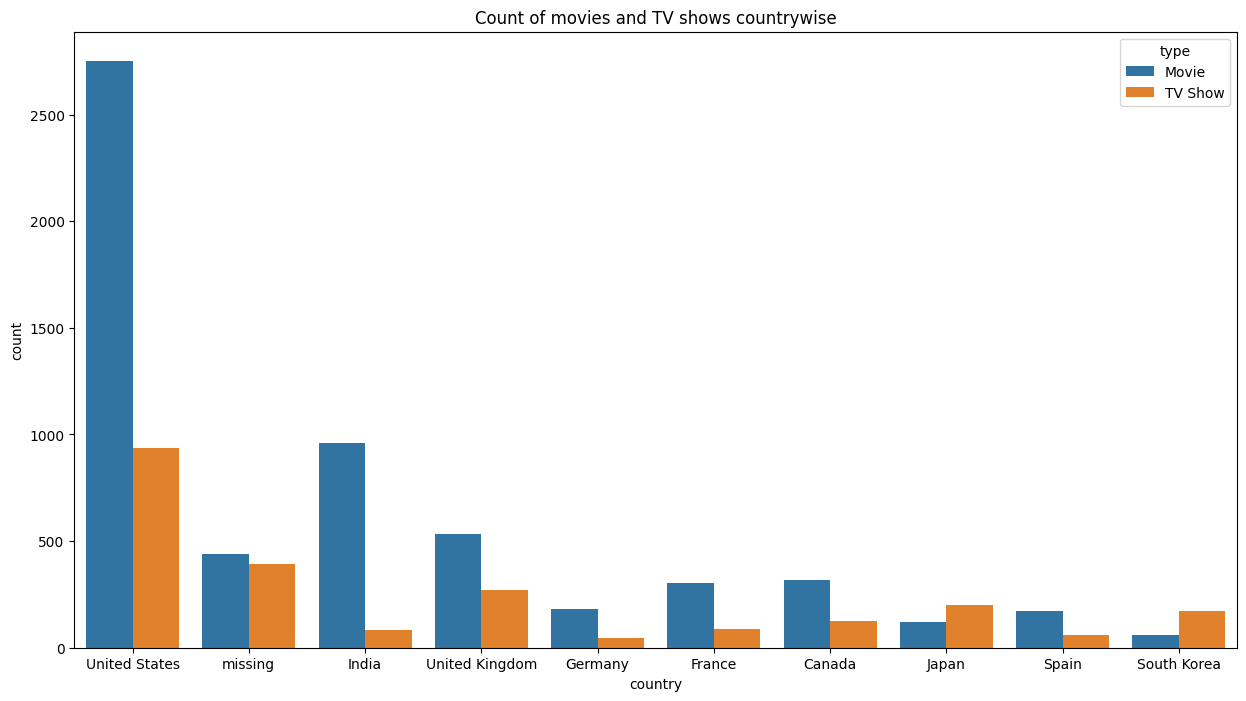

In [129]:

#exploding country column
country = df["country"].apply(lambda x: str(x).split(", ")).tolist() #exploding the country column
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]
     

Country_wise_trend = df.merge(df_country , on = "title") #making new dataframe by merfing df_country and original dataframe.
Country_wise_trend.drop(columns = "country_x" , inplace = True)
Country_wise_trend.rename(columns = {"country_y" : "country"}, inplace = True)
Country_wise_trend = Country_wise_trend.loc[Country_wise_trend["country"] != "Unknown"]
top10_country = Country_wise_trend["country"].value_counts().head(10).reset_index()
top10_country.rename(columns = {"index" :"country" , "country" : "count"}, inplace = True)
Country_wise_trend = Country_wise_trend.merge(top10_country, how = "inner" , on = "country")
plt.figure(figsize = (15,8))
sns.countplot(x ="country" , data =Country_wise_trend , hue = "type" )
plt.title("Count of movies and TV shows countrywise")
plt.show()

In [130]:

#exploding listed_in column
listed_in = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(listed_in, index = df["title"])
df_genre = df_genre.stack()
df_genre = df_genre.reset_index()
df_genre.drop(columns = "level_1" , inplace = True)
df_genre.columns = ["title" , "genre"]
df_genre.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


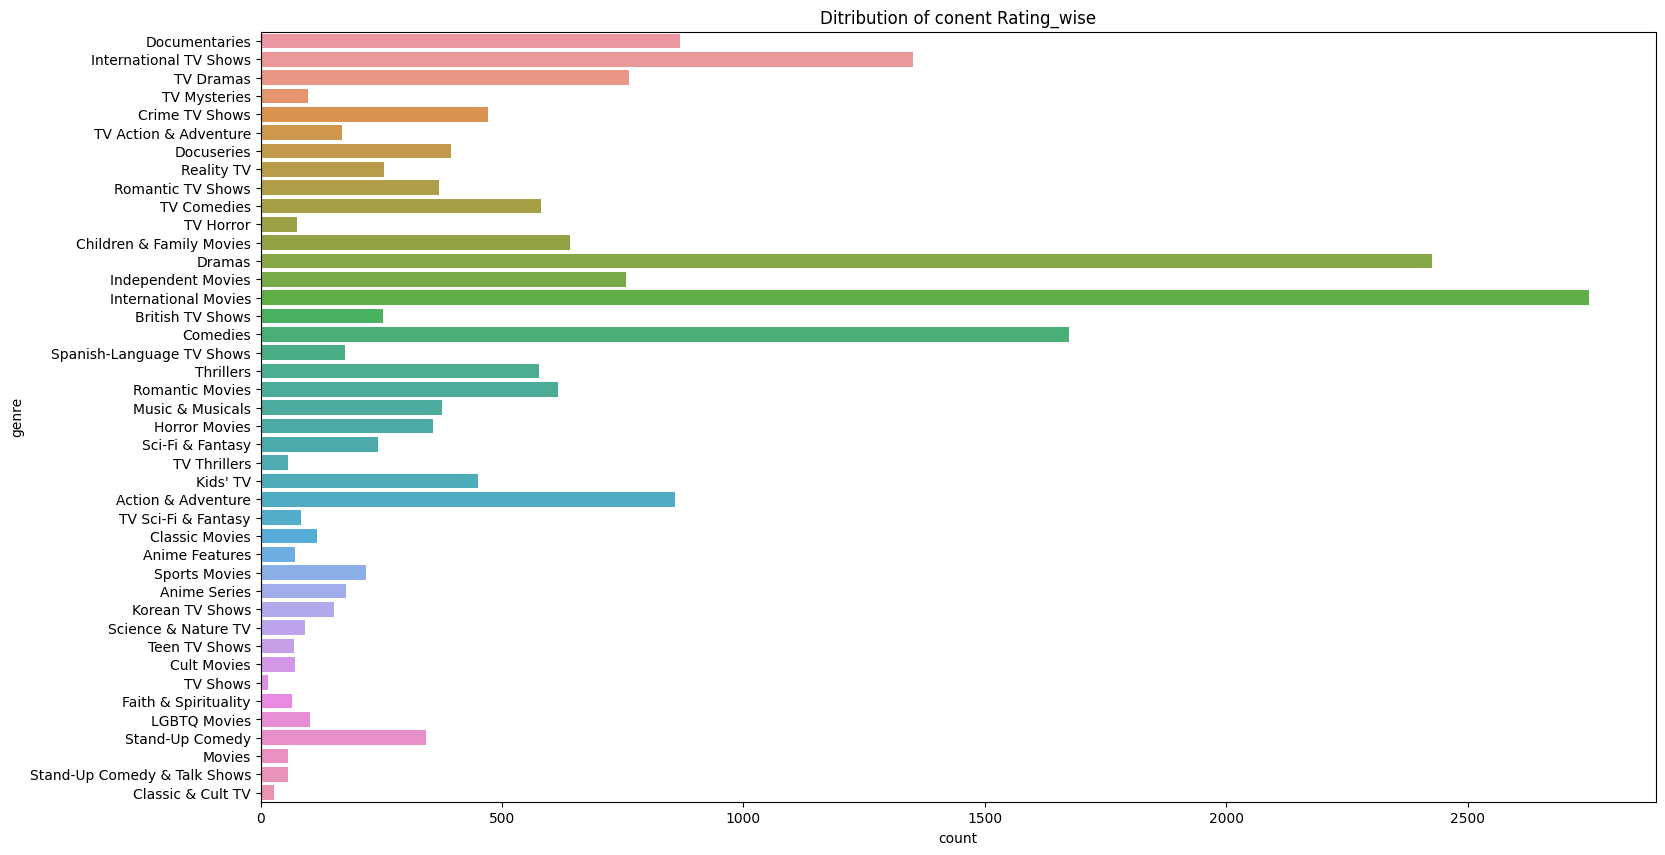

In [131]:

plt.figure(figsize = (18,10))
sns.countplot(y = "genre" , data =df_genre )
plt.title("Ditribution of conent Rating_wise")
plt.show()
     

In [132]:
#exploding cast column
cast = df["cast"].apply(lambda x : str(x).split(", ")).tolist()
df_cast = pd.DataFrame(cast,  index = df["title"])
df_cast = df_cast.stack()
df_cast = df_cast.reset_index()
df_cast.drop(columns = "level_1" , inplace = True)
df_cast.columns = ["title" , "cast"]
df_fav_cast = df.merge(df_cast , on = "title" )
     

cast_countrywise= df_fav_cast.merge(df_country , on = "title")
cast_countrywise= cast_countrywise.drop(columns = ["cast_x" , "country_x"])
cast_countrywise = cast_countrywise.rename(columns = {"cast_y" : "cast" , "country_y" : "country"})
cast_countrywise = cast_countrywise.loc[cast_countrywise["cast"] != "Unknown"].reset_index() #making new dataframe by dropping all rows whose cast is unknown and then resetting the index..00
cast_countrywise.head()
     

,index,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,month_added,cast,country
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,missing,United States
1,1,s2,TV Show,Blood & Water,missing,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,Ama Qamata,South Africa
2,2,s2,TV Show,Blood & Water,missing,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,Khosi Ngema,South Africa
3,3,s2,TV Show,Blood & Water,missing,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,Gail Mabalane,South Africa
4,4,s2,TV Show,Blood & Water,missing,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,Thabang Molaba,South Africa


In [141]:
df.drop(df[df['cast'] == 'missing'].index, inplace=True)


In [142]:
cast_countrywise["cast"].value_counts().head(5) #value_counts of the cast columns to get the most famous actors

missing               1004
Anupam Kher             46
David Attenborough      45
Vincent Tong            42
John Cleese             40
Name: cast, dtype: int64

Duration Summary Statistics:
Minimum duration: 8 min
Maximum duration: 312 min
Mean duration: 101.34 min
Median duration: 100.00 min


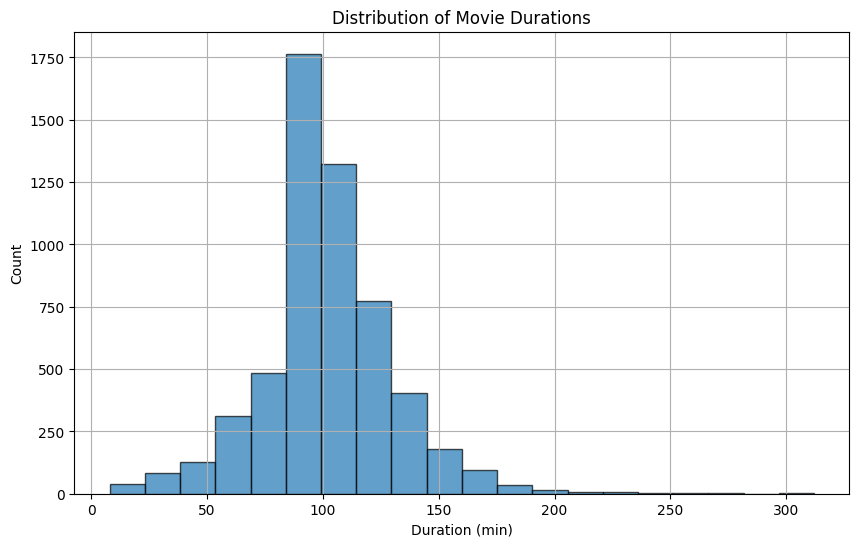

In [143]:
# Extract the movie durations without 'missing' values
movie_durations = df[(df['type'] == 'Movie') & (df['duration'] != 'missing')]['duration']
 # Convert the durations to numeric values (remove 'min' suffix)
movie_durations = movie_durations.str.replace(' min', '').astype(int)
 # Calculate summary statistics
min_duration = movie_durations.min()
max_duration = movie_durations.max()
mean_duration = movie_durations.mean()
median_duration = movie_durations.median()
 # Print the summary statistics
print("Duration Summary Statistics:")
print("Minimum duration: {} min".format(min_duration))
print("Maximum duration: {} min".format(max_duration))
print("Mean duration: {:.2f} min".format(mean_duration))
print("Median duration: {:.2f} min".format(median_duration))
 # Create a histogram of movie durations
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(movie_durations, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.grid(True)
plt.show()

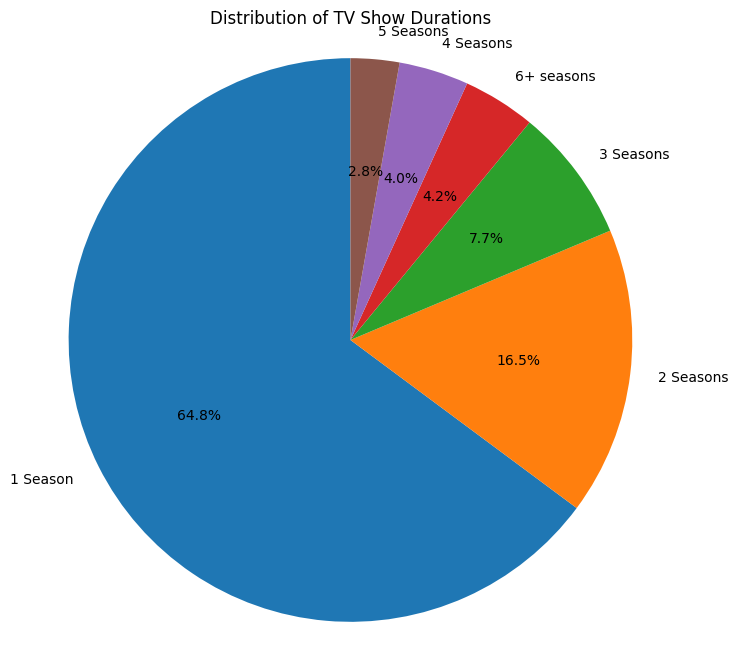

In [144]:
# Filter TV show durations without 'missing' values
tv_show_durations = df[(df['type'] == 'TV Show') & (df['duration'] != 'missing')]['duration']
# Combine durations after 6 seasons into a single category
tv_show_durations = tv_show_durations.apply(lambda x: '6+ seasons' if int(x.split(' ')[0]) >= 6 else x)
# Count the occurrences of each duration
duration_counts = tv_show_durations.value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TV Show Durations')
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
 # Display the chart
plt.show()

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

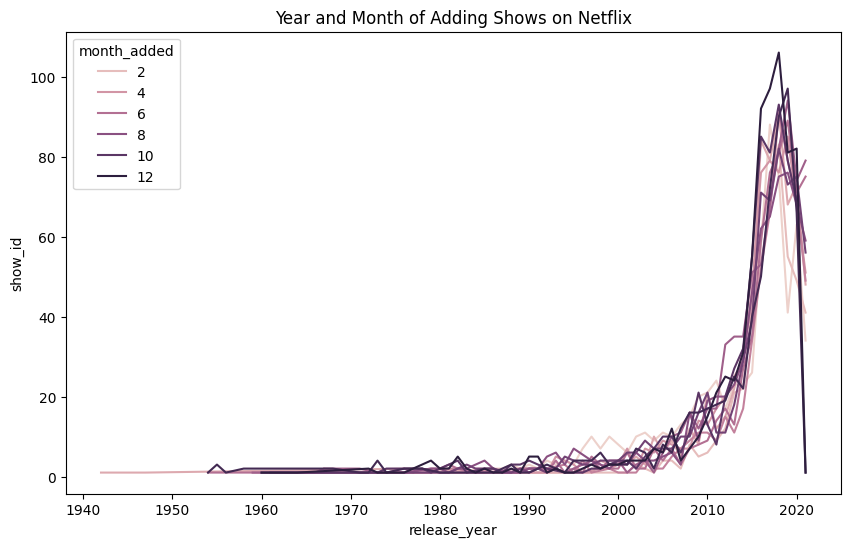

In [162]:
month_year = df.groupby(['release_year' , 'month_added'])['show_id'].count().reset_index()
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'release_year', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')

In [173]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added'],
      dtype='object')

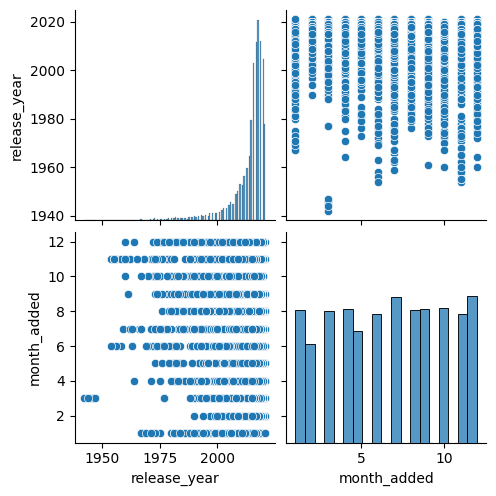

In [177]:
sns.pairplot(df)
plt.show()

# Insights based on Non-Graphical and Visual Analysis

* Around 70% content on Netflix is Movies and around 30% content is TV shows.
* The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.
* Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.
* Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.
* Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.
* Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.
* The release year for shows is concentrated in the range 2005-2021.
* 50 mins - 150 mins is the range of movie durations, excluding potential outliers.
* 1-3 seasons is the range for TV shows seasons, excluding potential outliers.
* various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).
* Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.
* International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
* Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.
* Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.
* Shorter duration movies have been popular in last 10 years.

# Business Insights
Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix. Senior Citizen could be the target audience for such content, which is almost missing currently.
Maximum content (more than 80%) is
TV-MA - Content intended for mature audiences aged 17 and above.
TV-14 - Content suitable for viewers aged 14 and above.
TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)
R - Restricted Content, that may not be suitable for viewers under age 17.
These ratings' movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13. It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.

Most popular genres on Netflix are International Movies and TV Shows , Dramas , Comedies, Action & Adventure, Children & Family Movies, Thrillers.
Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.
Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3)
This can be considered while production of new content on Netflix.

drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.

# Recommandation